# Por que funciona el SGD? Motivacion

Asumamos un caso cencillo, un solo parametro $\theta$ y un modelo de regresion. Piense en un ajuste a puntos en un plano, que se ajustan a una recta que pasa por el origen y tiene pendiente $\theta$.
Asumamos 5 puntos $(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4), (x_5, y_5) $

Se deben ajustar

\begin{eqnarray}
y_1 &=& \theta x_1 \\
y_2 &=& \theta x_2 \\
y_3 &=& \theta x_3 \\
y_4 &=& \theta x_4 \\
y_5 &=& \theta x_5 \\
\end{eqnarray}

Recuerden la funcion objetivo (de costo)

$$J(\theta) = \frac15 \sum_{i=1}^5 ( \theta x_i - y_i)^2 .$$

Esta funcion de costo (global) se puede escribir usando funciones de costo
(local)

$$C_i(\theta) = (\theta x_i - y_i)^2 .$$


El gradiente de $J$ se escribe como


$$\nabla J(\theta) = \frac{d J}{d \theta} =\frac25 \sum_{i=1}^5 (\theta x_i - y_i) x_i .$$

El gradiente de cada funcion local de costo $C_i$


$$\nabla C_i(\theta) = \frac{d C_i}{d \theta} = 2 x_i( \theta x_i - y_i).$$


Entonces encontramos que


$$ \nabla J(\theta) = \frac15 \sum_{i=1}^5 \nabla C_i (\theta).$$

Cada funcion de costo $C_i(\theta)$ es un parabola


$$(\theta x_i - y)^2 = x_i^2 \theta^2 - 2 \theta x_i y_i + y_i^2 .$$

Escojamos cinco puntos para ilustrar

$$(-1 , -0.5), (1,1), (3,2), (4,3) , (5,6) .$$

\begin{eqnarray}
C_1 (\theta) &=& (-\theta + 0.5)^2  \quad \text{el minimo esta en   } \theta=0.5\\
C_2 (\theta) &=& (\theta -1)^2 \quad \text{el minimo esta en   } \theta=1 \\
C_3 (\theta) &=& (3 \theta -2)^2  \quad \text{el minimo esta en   } \theta=0.6667\\
C_4 (\theta) &=& (4 \theta -3)^2  \quad \text{el minimo esta en   } \theta=0.75\\
C_5 (\theta) &=& (5 \theta -6)^2  \quad \text{el minimo esta en   } \theta=1.2\\
\end{eqnarray}









La funcion objetivo es


$$\frac15 \left [ (-\theta+0.5)^2 + (\theta -1)^2 + (3 \theta -2)^2 + (4 \theta-3)^2 + (5 \theta -6)^2   \right ] .$$

Los gradientes locales son


\begin{eqnarray}
\nabla C_1 (\theta) &=& -2 ( -\theta + 0.5) \\
\nabla C_2 (\theta) &=& 2 ( \theta -1) \\
\nabla C_3 (\theta) &=& 6 ( 3 \theta -2) \\
\nabla C_4 (\theta) &=& 8 ( 4 \theta -3) \\
\nabla C_5 (\theta) &=& 10 ( 5 \theta -5) \\
\end{eqnarray}

y

$$\nabla J(\theta) = \frac15  \left [ -2(-\theta + 0.5) + 2(\theta -1) + 6(3 \theta -2) + 8(4 \theta -3) + 10(5 \theta -6) \right] .$$




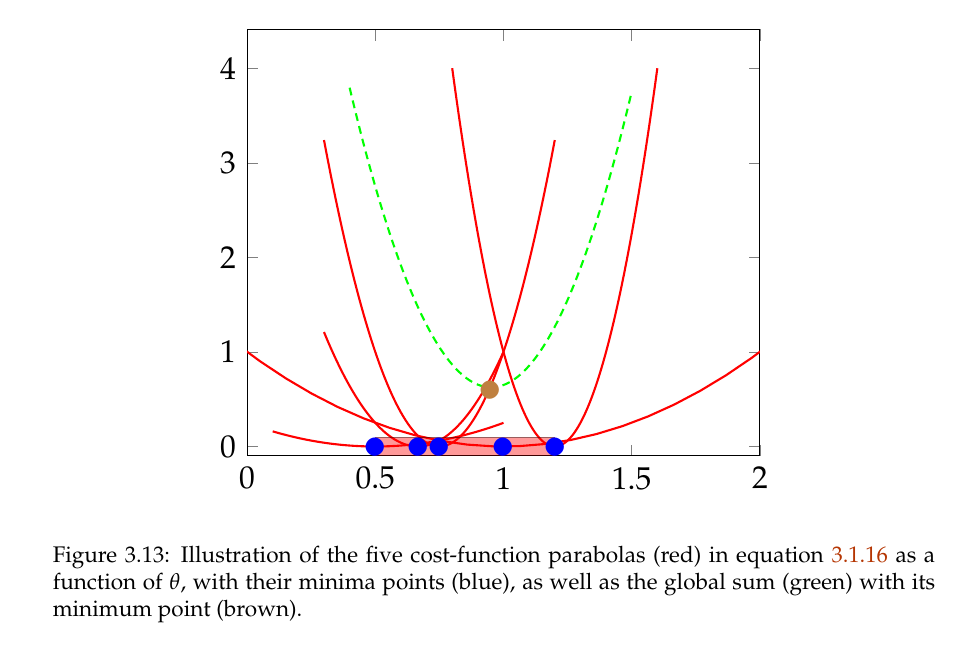

Existe un intervalo $[m, M]$ donde $m$ es la abscisa minima de los minimos y $M$ es la abscisa maxima de los minimos.  Esta region (en este caso este intervalo) se llama la **region de confusion**. En la figura es la region sombreada en rosado, el intevalo $[0.5, 1.2].

Por que es importante la **region de confusion**. .Por que a la izquierda de $m$ todas las pendientes de las funciones de costo local son negativas.
De igual forma, a la derecha de $M$ todas las pendientes son positivas.

Esto por que es importante. Por que si comenzamos lejos del punto de minima.
podemos asegurar que el gradiente tiene el **signo** correcto.

Tenemos las siguientes preguntas.

1. Pero que pasa si estamos dentro la region de confusion.
2. Como estimamos el error o lo lejos que podemos estar de la solucion
3. Como podemos estimar el tamanho del parametro de aprendizaje $\alpha$ (o en el demo de la clase anterior $\eta$).


Discutamos la pregunta 1.

Traigamos otra figura, calculada con el software de
[dl2 package](https://pypi.org/project/d2l/).




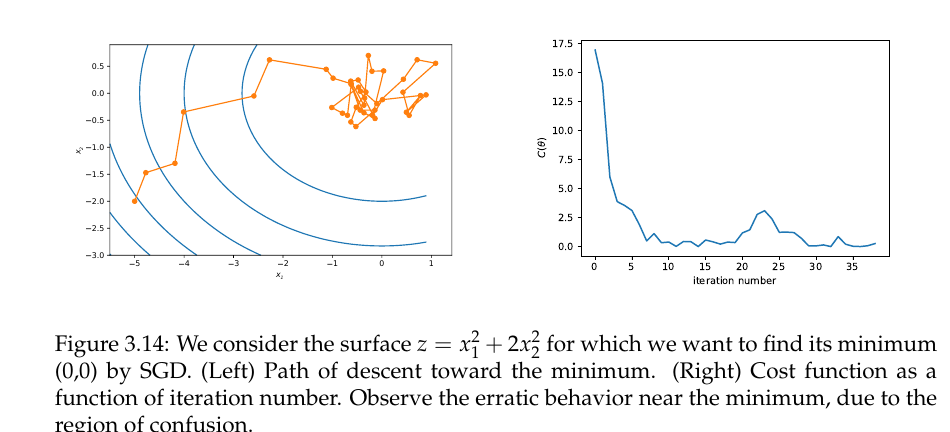

1. Dentro la region de confusion, el gradiente se conforma de forma erratica.

2. Hablemos de dos estadisticas clasicas. La media (la esperanza)


Si la distribucion (de los gradientes locales, pensados como variables aleatorias) es uniforme
$$\mathbb{E}[ \nabla C_i(\theta) ] = \frac1m \sum_{i=1}^m \nabla C_i(\theta) = \nabla J(\theta)   .$$

Aca hay una buena noticia. El gradiente global, es la media de los gradientes locales. Entonces si cometo un error en una direccion, mas adelente lo puedo "compensar" con el error de otro gradiente en direccion contrario.

Si la distribucion de los gradientes locales no es uniforme tenemos


$$\mathbb{E}[ \nabla C_i(\theta) ] = \sum_{i=1}^m \mu_i \nabla C_i(\theta) = \nabla J(\theta)   .$$

donde $\mu_i$ es la probabilidad de la muestra $i$.


En resumen **La esperanza de los gradientes locales es el gradiente global**

El error de encontrar el minimo se puede de alguna forma medir con la varianza de los gradientes.


$$ \mathbb{V}[ \nabla C_i(\theta)] = \frac{1}{m-1} \sum_{i=1}^m \| \nabla C_i(\theta) - \nabla J(\theta) \|^2 .$$

Si esta varianza es pequenha el cambio de $\nabla J(\theta)$ a $\nabla C_i(\theta)$ vale la pena.  En teoria funciona preciso para funciones lineales, pues alli $\nabla J=constate= \nabla C_i$, pero esto no tiene fundamento en la practica.


## Minibach gradient descent.
La idea del "minibatch" es reducir esta varianza. Tomamos todos los datos que son $m$ y este grupo lo dividmos en $k$ grupos (batches).

* Si $k=1$ entonces es un solo grupo y estamos tomando **todos** los $m$. A este metodo lo conocemos como **batch gradient descent**.

* Si $k=m$, entonces tenemos $m$ grupos tomados de a **uno** y ese el caso de **stochastic gradient discent**

* Si $1 < k < m$ lo llamamos **minibach** gradient descent.

El algortimo del minibatch gradient descent.




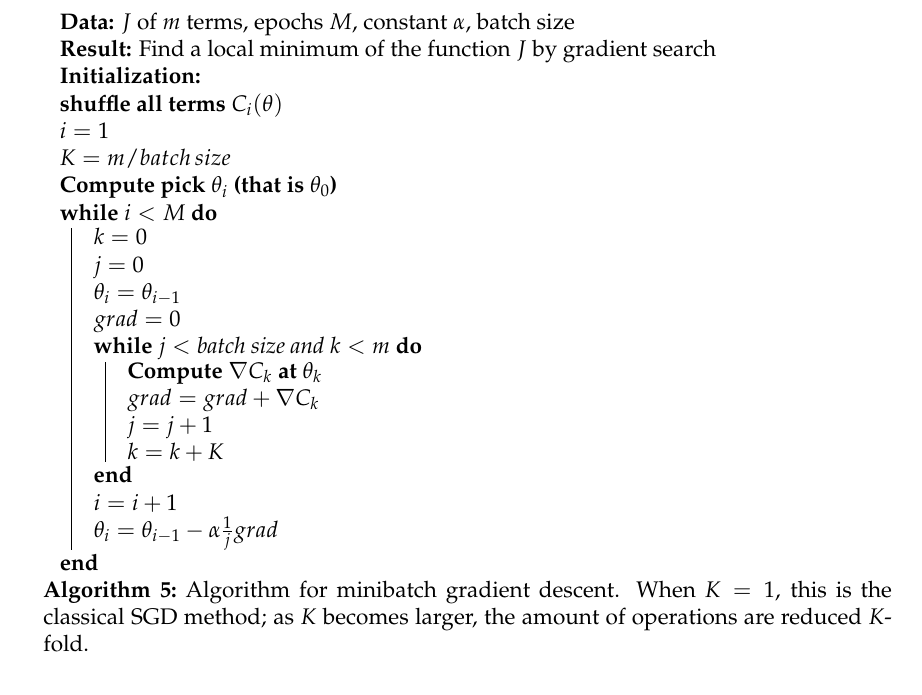

## Metodos modernos de descenso con gradiente.

Si la funcion es cuadratica **nada le gana** al **conjugate gradient**.
Sin embargo este solo es el caso en modelos modelos muy simples como
**regresion lineal**, o tratar de resolver problemas $Ax=b$.

Que pasa si la funcion objetivo esta lejos de ser cuadratica.
Por ejemplo
[funciones de prueba para optimizacion](https://en.wikipedia.org/wiki/Test_functions_for_optimization).
Toca buscar otros tipos de algorimo. Ya se mencionaron, recordamos

* Gradiente conjugado **no lineal** (extension del gradiente conjugado, linear).  [non-linear conjugate gradient](https://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method).
Aca se usan los Newton y Pseud-Newton algorithms. Uno muy usado (creo que es el de la tarea para entregar la semana entrante) es el
L-BFGS: Limite memory, Broyden-Fletcher-Goldfarb-Shanno.

* Hay tecnicas para acelerar el gradiente.
    * Momentum
    * Nesterov
    * AdaGrad
    * AdaDelta
    * Adam
    * RMSprop
    * etc

* Los metodos evolutivos, biologicos (genetic algorithms, swarm particle optimization). Estos no se basan en gradiente.






## Mas "**features**" (mas dimensiones). (propiedades o atributos)

Asumos que para la casa que queremos vender, queremos usar mas parametros. Por ejemplo el numero de habitaciones. O sea, tenemos dos parametros, el numero de habitaciones y el area de la casa (no olvide el "bias" , el intercept).

Por ejemplo

$$h(\theta_0, \theta_1, \theta_2; x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 .$$ (plano)

Veamos una tabla (juguete) de estos datos





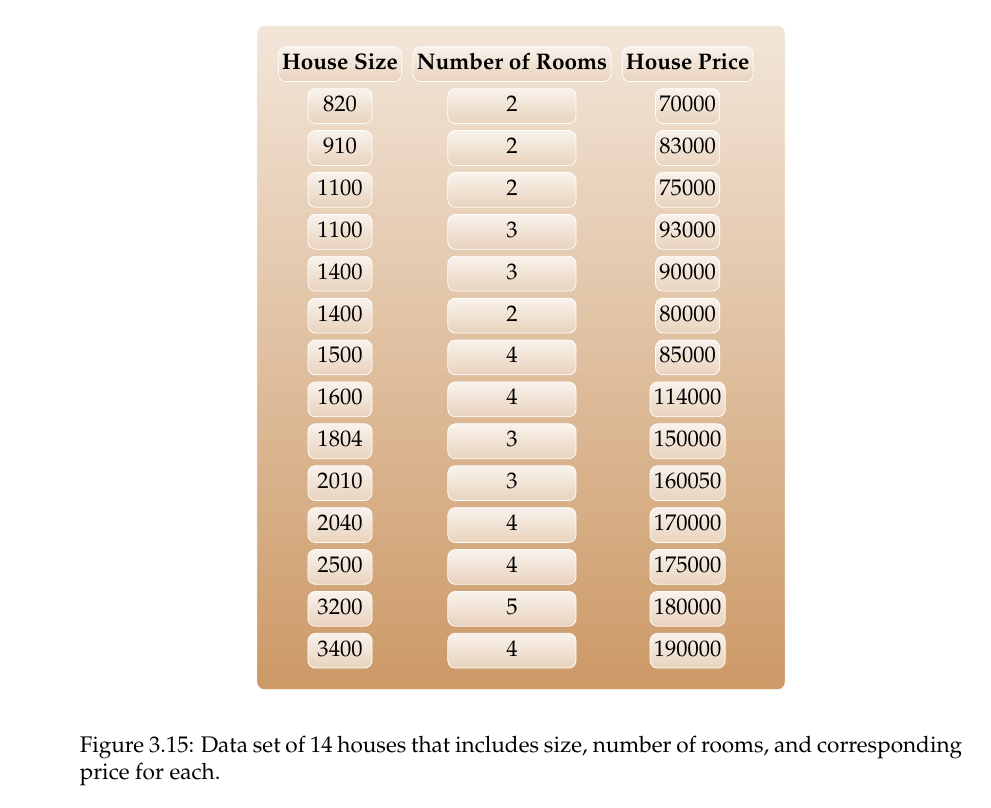

Si quisieramos poner esto en forma matricial. Seria


\begin{eqnarray}
X = \begin{pmatrix} 1 & 820 & 2 \\ 1 & 910 & 2 \\ 1 & 1100 & 2 \\ 1 & 1100 & 3 \\ \vdots & \vdots & \vdots  \\ 1 & 3400 & 4 \end{pmatrix}
\quad , \quad \theta = \begin{pmatrix} \theta_0 & \theta_2 & \theta_3 \end{pmatrix} \quad , \quad
y = \begin{pmatrix} 70000 \\83000  \\ 75000 \\ 93000 \\ \vdots  \\ 190000 \end{pmatrix}
\end{eqnarray}

El sistema a resolver es $X \theta  = y$. Esto es "mas de lo mismo".

Como se resuelve este sistema?

* Si las dimensiones no son muy grandes, use las ecuaciones normales.
$$ \theta  = (X^T X)^{-1} X^T y .$$
si el problema requiere regularizacion entonces
$$ \theta  = (X^T X + \lambda I)^{-1} X^T y .$$
donde $\lambda > 0$ y no muy grande.


* Si las dimensiones son muy grandes, use **conjugate gradient**.
Recueren que el gradiente de la funcion objetivo es $(X^T X)X^T y ? $.







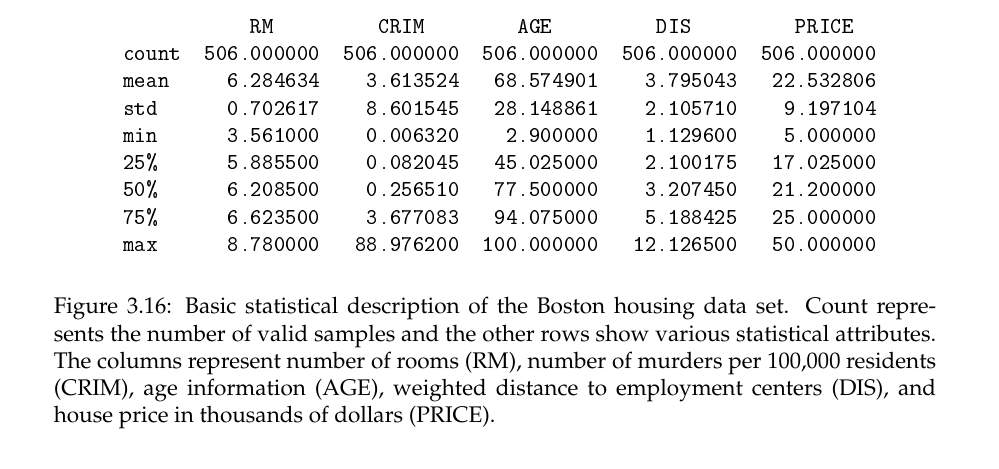

La tabla anterior es tomada de
[Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset).





Proxima clase

## Fature Normalizacion: normalizacion de parametros.